In [56]:
from sklearn import datasets, neighbors, linear_model
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
scaler = StandardScaler()
scaler.fit(digits.data)

# X_digits = scaler.transform(digits.data)

X_digits = digits.data / digits.data.max()
y_digits = digits.target

n_samples = len(X_digits)


digits : array of lists, containing 64 values.
Those values represent the pixels of a 8 * 8 image.

In [57]:
from sklearn.model_selection import cross_val_score

clf = neighbors.KNeighborsClassifier(n_neighbors=5, metric = "minkowski", weights = 'uniform')
scores = cross_val_score(clf, X_digits, y_digits, cv=5)

print("Moyenne obtenue pour la cross validation en 5-fold-cross : ", sum(scores)/len(scores), )

Moyenne obtenue pour la cross validation en 5-fold-cross :  0.9627899114966898


C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Meilleur estimateur trouvé:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
Meilleurs paramètres:
{'metric': 'euclidean', 'n_neighbors': 3}


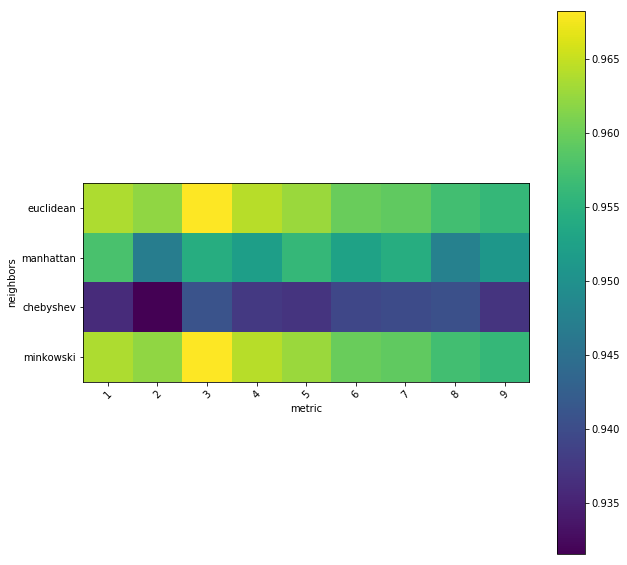

In [50]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

weights = ['uniform', 'distance']
neigbor_range = [i for i in range(1, 10)]
# metrics = ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]
# took the metrics needing arg out atm

metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]
# parameters = { 'weights': weights, 'metric':metrics }
parameters = { 'n_neighbors' :neigbor_range, 'metric':metrics }

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights = 'uniform')
gridsearch=GridSearchCV(clf, parameters)
gridsearch.fit(X_digits, y_digits)

print("Meilleur estimateur trouvé:")
print(gridsearch.best_estimator_)
print("Meilleurs paramètres:")
print(gridsearch.best_params_)

scores = gridsearch.cv_results_['mean_test_score'].reshape(len(metrics),len(neigbor_range))
plt.figure(figsize=[10,10])
plt.imshow(scores)
plt.xlabel('metric')
plt.ylabel('neighbors')
plt.xticks(np.arange(len(neigbor_range)), neigbor_range, rotation=45)
plt.yticks(np.arange(len(metrics)), metrics)
plt.colorbar()
plt.show();


C:\Users\gadey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Meilleur estimateur trouvé:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')
Meilleurs paramètres:
{'metric': 'euclidean', 'n_neighbors': 3}


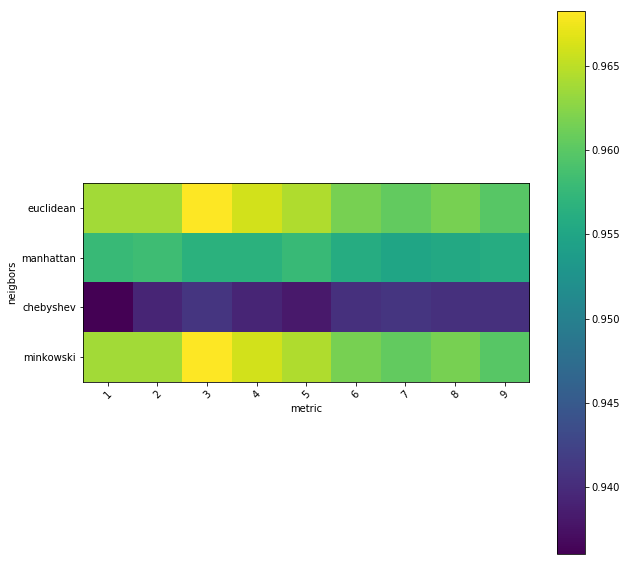

In [51]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

weights = ['uniform', 'distance']
neigbor_range = [i for i in range(1, 10)]
# metrics = ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]
# took the metrics needing arg out atm

metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]
# parameters = { 'weights': weights, 'metric':metrics }
parameters = { 'n_neighbors' :neigbor_range, 'metric':metrics }

clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights = 'distance')
gridsearch=GridSearchCV(clf, parameters)
gridsearch.fit(X_digits, y_digits)

print("Meilleur estimateur trouvé:")
print(gridsearch.best_estimator_)
print("Meilleurs paramètres:")
print(gridsearch.best_params_)

scores = gridsearch.cv_results_['mean_test_score'].reshape(len(metrics),len(neigbor_range))
plt.figure(figsize=[10,10])
plt.imshow(scores)
plt.xlabel('metric')
plt.ylabel('neigbors')
plt.xticks(np.arange(len(neigbor_range)), neigbor_range, rotation=45)
plt.yticks(np.arange(len(metrics)), metrics)
plt.colorbar()
plt.show();


best result seems to be obtained for :

- k = 3
- weights = distance
- metric = euclidean

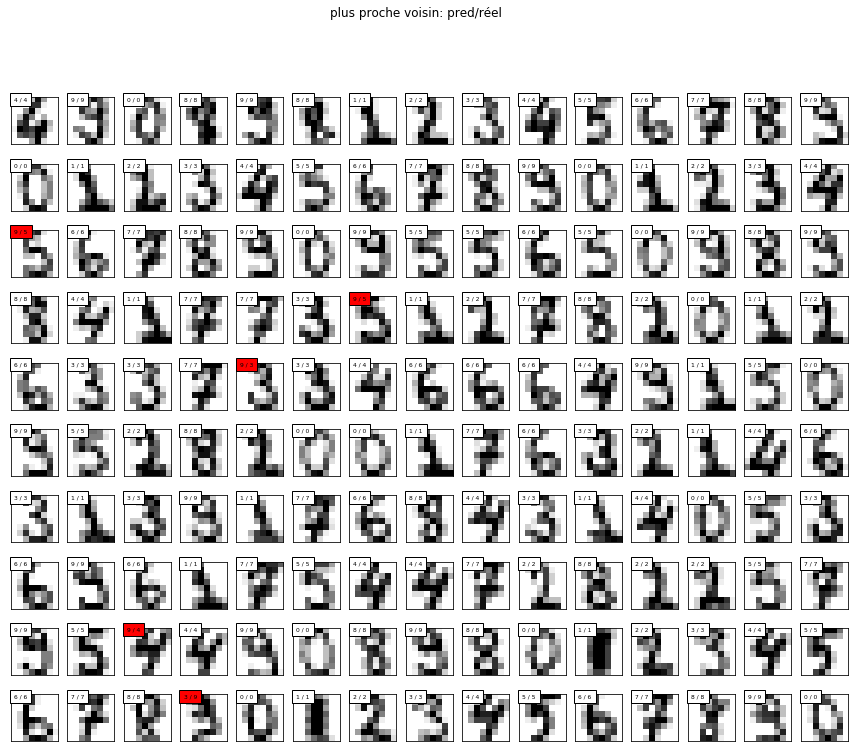

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def affichage_150_images(X_test,y_test,y_pred):
    plt.figure(figsize=[15,12])   
    for n in range(150):
        plt.subplot(10,15,n+1,xticks=[],yticks=[])
        plt.imshow(np.reshape(X_test[n,:],(8,8)),cmap='gray_r',vmin=0,vmax=16)
        if y_pred_nn[n]==y_test[n]:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='white', alpha=1))    
        else:
            plt.text(0.1,0.1,str(y_pred[n])+' / '+str(y_test[n]),fontsize=6,bbox=dict(facecolor='red', alpha=1))    
    plt.suptitle('plus proche voisin: pred/réel');

knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights = 'distance', metric = 'euclidean')  
knn.fit(X_digits[:900], y_digits[:900])
y_pred_nn = knn.predict(X_digits[900:])
affichage_150_images(digits.data[900:],y_digits[900:],y_pred_nn)      


In [38]:
from sklearn import metrics
    
print(metrics.classification_report(y_digits[900:],y_pred_nn))

print(metrics.confusion_matrix(y_digits[900:],y_pred_nn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.98      0.94      0.96        86
           3       0.92      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.97      1.00      0.98        89
           8       0.95      0.97      0.96        86
           9       0.91      0.93      0.92        92

   micro avg       0.96      0.96      0.96       897
   macro avg       0.96      0.96      0.96       897
weighted avg       0.96      0.96      0.96       897

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 84  0  1  0  2  2  1]
 [ 0  0  0  0 86  0  0  1  0  5]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0

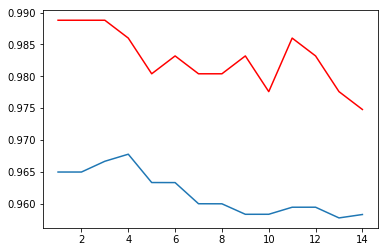

In [45]:
scores = []
max_score = []
nei = range(1, 15)
for i in range(1, 15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i, metric = "euclidean", weights = 'distance')
    score = cross_val_score(clf, X_digits, y_digits, cv=5)
    scores.append(sum(score)/len(score))
    max_score.append(max(score))
    
plt.plot(nei, scores, nei, max_score, 'r')